In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gold_dataset = pd.read_csv('gld_price_data.csv')

In [3]:
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_dataset.shape

(2290, 6)

In [6]:
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
gold_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [12]:
gold_dataset_corr = gold_dataset.drop('Date',axis=1)
correlation = gold_dataset_corr.corr()

<Axes: >

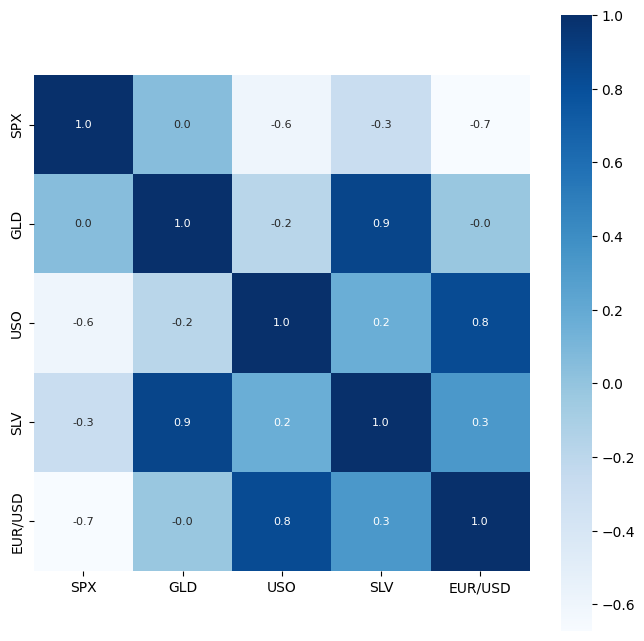

In [14]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8},cmap='Blues')

In [15]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


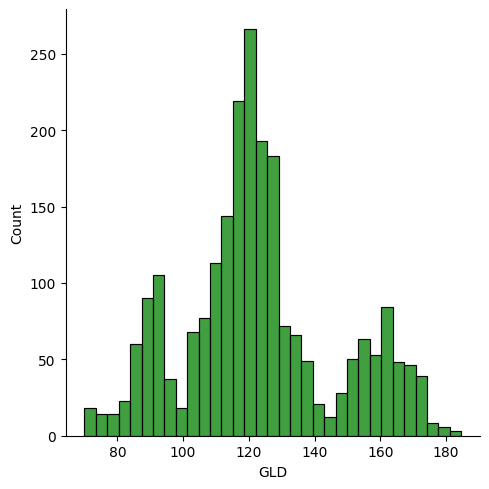

In [16]:
sns.displot(gold_dataset['GLD'],color='green')

In [17]:
X = gold_dataset.drop(['Date', 'GLD'],axis=1)
Y = gold_dataset['GLD']

In [18]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [20]:
regressor = RandomForestRegressor(n_estimators=100)

In [21]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [22]:
test_data_regression = regressor.predict(X_test)


In [23]:
print(test_data_regression)

[168.59319919  81.95769992 116.10360049 127.71550076 120.64680148
 154.74949751 150.52649849 126.21460046 117.56939863 125.98770068
 116.37850112 172.34800079 141.80149781 167.77379838 115.14940043
 117.8168006  138.35510254 170.02350042 159.30710319 157.87849977
 155.10410015 125.13960016 175.71759957 157.09780413 125.18600056
  93.68429987  77.57520028 120.67869969 119.16289991 167.10130059
  88.07850048 125.36350015  90.82270054 117.66780052 121.25149947
 136.39190065 115.703101   115.06620058 146.98070039 107.15570124
 104.32990236  87.12809785 126.45490067 117.9826003  154.14619843
 119.62419981 108.4366001  108.10089838  93.23340066 127.01029806
  75.43950012 113.71799902 121.5930002  111.42669921 118.94609911
 120.93859989 158.51580072 167.64690123 146.92869705  85.75459873
  94.24660042  86.82189906  90.45490035 118.95070085 126.37110069
 127.52860003 169.87159955 122.31269919 117.28119896  98.65150022
 168.04300144 143.00549842 131.96000199 121.21680213 121.44359922
 119.71020

In [25]:
error_score = metrics.r2_score(Y_test,test_data_regression)
print('R squared error = ',error_score)

R squared error =  0.98944218165073


In [26]:
Y_test = list(Y_test)

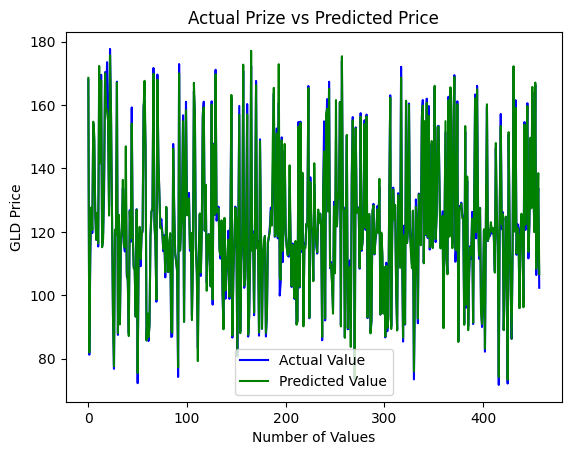

In [30]:
plt.plot(Y_test, color='blue', label= 'Actual Value')
plt.plot(test_data_regression, color= 'green', label='Predicted Value')
plt.title('Actual Prize vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
